<a href="https://colab.research.google.com/github/BHARATHBN-123/Creditcard_Fraud_detection/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
np.random.seed(2)

**DATA EXPLORATION**

In [ ]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/credit_card_fraudadetection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import StandardScaler
df['normalised_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

#dropping Amount and Time column

In [ ]:
df = df.drop(['Amount','Time'], axis =1)


In [ ]:
df.shape

(284807, 30)

In [ ]:
X = df.iloc[:, df.columns!= "Class"]
y = df.iloc[:, df.columns== "Class"]

In [ ]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalised_amount'],
      dtype='object')

In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train  ,y_test = train_test_split(X , y , test_size = 0.4 , random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170884, 29)
(113923, 29)
(170884, 1)
(113923, 1)


In [ ]:
X_train = np.array(X_train) 
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model = Sequential([
                    Dense(units = 16,input_dim = 29,activation = 'relu'),
                    Dense(units = 24,activation = 'relu'),
                    Dropout(0.5),
                    Dense(units = 20,activation = 'relu'),
                    Dense(units = 21,activation = 'relu'),
                    Dense(units = 1,activation = 'sigmoid'),])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 21)                441       
                                                                 
 dense_4 (Dense)             (None, 1)                 22        
                                                                 
Total params: 1,851
Trainable params: 1,851
Non-trainabl

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train , y_train , batch_size = 15 ,epochs = 5 )

Epoch 1/5
11393/11393 [==============================] - 16s 1ms/step - loss: 0.0101 - accuracy: 0.9982
Epoch 2/5
11393/11393 [==============================] - 15s 1ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
11393/11393 [==============================] - 16s 1ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
11393/11393 [==============================] - 15s 1ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/5
11393/11393 [==============================] - 15s 1ms/step - loss: 0.0031 - accuracy: 0.9994


In [ ]:
results = model.evaluate(X_test , y_test[0:113923])

3561/3561 [==============================] - 3s 936us/step - loss: 0.0229 - accuracy: 0.9966


In [ ]:
print(results)

[0.02291189320385456, 0.9966380596160889]


In [ ]:
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
ypred = model.predict(X_test)
ytest = pd.DataFrame(y_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test[0:113923] , ypred.round())

In [ ]:
print(cnf_matrix)


[[113540    191]
 [   192      0]]


Confusion matrix, without normalization
[[113540    191]
 [   192      0]]


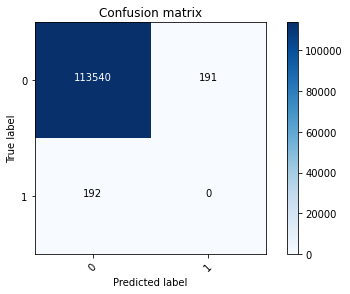

In [ ]:
plot_confusion_matrix(cnf_matrix , classes = [0,1])

In [ ]:
plt.show()